<a href="https://colab.research.google.com/github/pkdyn/ManningVsReilly/blob/main/bkCvr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

import tensorflow as tf
print (tf.__version__)
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


2.5.0


In [3]:

!wget --no-check-certificate \
https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip 
!unzip -q /content/main.zip
!rm /content/main.zip



--2021-07-10 07:22:24--  https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main [following]
--2021-07-10 07:22:24--  https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]   4.46M  28.9MB/s    in 0.2s    

2021-07-10 07:22:25 (28.9 MB/s) - ‘main.zip’ saved [4681816]



In [4]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=30.0,
    height_shift_range=30.0,
    shear_range=10.0,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    preprocessing_function=preprocess_input) 

train_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train",
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training') 

val_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train", 
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation') 

test_datagen = ImageDataGenerator( preprocessing_function=preprocess_input,) 
test_ds = test_datagen.flow_from_directory(
  "/content/ManningVsReilly-main/cvr_ds/test",
  shuffle=False,
  target_size=(100, 100), 
  batch_size=32,
)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [5]:
def make_model(learning_rate, droprate, size):
    base_model = Xception(
        weights='imagenet',
        input_shape=(100, 100, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(100, 100, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(1, activation='sigmoid')(drop)
    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    
    return model

In [6]:
model = make_model(learning_rate=0.001, droprate=0.0, size=10)
history_0_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.0001, droprate=0.0, size=10)
history_0_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.0001, droprate=0.0, size=10)
history_0_00001 = model.fit(train_ds, epochs=15, validation_data=val_ds)

epochs = np.arange(15)
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']
val_0_00001 = history_0_00001.history['val_accuracy']


plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_001, color='black', linestyle='solid', label='0.001')
plt.plot(epochs, val_0_0001, color='black', linestyle='dashed', label='0.0001')
plt.plot(epochs, val_0_00001, color='black', linestyle='dotted', label='0.00001')
plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)
plt.legend()
plt.show()

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/15
15/15 [==============================] - 25s 1s/step - loss: 0.4209 - accuracy: 0.8354 - val_loss: 0.1929 - val_accuracy: 0.9500
Epoch 2/15
15/15 [==============================] - 20s 1s/step - loss: 0.1473 - accuracy: 0.9667 - val_loss: 0.1312 - val_accuracy: 0.9667
Epoch 3/15
15/15 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9667

KeyboardInterrupt: ignored

Epoch 1/30
15/15 [==============================] - 5s 199ms/step - loss: 0.6445 - accuracy: 0.6458 - val_loss: 0.5438 - val_accuracy: 0.8583
Epoch 2/30
15/15 [==============================] - 2s 141ms/step - loss: 0.5148 - accuracy: 0.7375 - val_loss: 0.3217 - val_accuracy: 0.9583
Epoch 3/30
15/15 [==============================] - 2s 142ms/step - loss: 0.4634 - accuracy: 0.7479 - val_loss: 0.2718 - val_accuracy: 0.9750
Epoch 4/30
15/15 [==============================] - 2s 141ms/step - loss: 0.4048 - accuracy: 0.7833 - val_loss: 0.2346 - val_accuracy: 0.9667
Epoch 5/30
15/15 [==============================] - 2s 141ms/step - loss: 0.3982 - accuracy: 0.7875 - val_loss: 0.2270 - val_accuracy: 0.9500
Epoch 6/30
15/15 [==============================] - 2s 143ms/step - loss: 0.3864 - accuracy: 0.7896 - val_loss: 0.1766 - val_accuracy: 0.9750
Epoch 7/30
15/15 [==============================] - 2s 142ms/step - loss: 0.3857 - accuracy: 0.8104 - val_loss: 0.2193 - val_accuracy: 0.9667
Epoch 

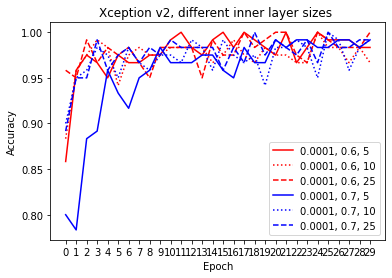

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.6, size=5)
history_5_6_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)

model = make_model(learning_rate=0.001, droprate=0.6, size=10)
history_10_6_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)

model = make_model(learning_rate=0.001, droprate=0.6, size=25)
history_25_6_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


model = make_model(learning_rate=0.001, droprate=0.7, size=5)
history_5_7_0001 = model.fit(train_ds, epochs=30, validation_data=val_ds)

model = make_model(learning_rate=0.001, droprate=0.7, size=10)
history_10_7_0001 = model.fit(train_ds, epochs=30, validation_data=val_ds)

model = make_model(learning_rate=0.001, droprate=0.7, size=25)
history_25_7_0001 = model.fit(train_ds, epochs=30, validation_data=val_ds)


epochs = np.arange(15)
val_5_6_0001 = history_5_6_0001.history['val_accuracy']
val_10_6_0001 = history_10_6_0001.history['val_accuracy']
val_25_6_0001 = history_25_6_0001.history['val_accuracy']

val_5_7_0001 = history_5_7_0001.history['val_accuracy']
val_10_7_0001 = history_10_7_0001.history['val_accuracy']
val_25_7_0001 = history_25_7_0001.history['val_accuracy']

plt.figure(figsize=(6, 4))
plt.plot(epochs, val_5_6_0001, color='red', linestyle='solid', label='0.0001, 0.6, 5')
plt.plot(epochs, val_10_6_0001, color='red', linestyle='dotted', label='0.0001, 0.6, 10')
plt.plot(epochs, val_25_6_0001, color='red', linestyle='dashed', label='0.0001, 0.6, 25')

plt.plot(epochs, val_5_7_0001, color='blue', linestyle='solid', label='0.0001, 0.7, 5')
plt.plot(epochs, val_10_7_0001, color='blue', linestyle='dotted', label='0.0001, 0.7, 10')
plt.plot(epochs, val_25_7_0001, color='blue', linestyle='dashed', label='0.0001, 0.7, 25')

plt.title('Xception v2, different inner layer sizes ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.7, size=25)
model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
15/15 [==============================] - 5s 193ms/step - loss: 0.5561 - accuracy: 0.7188 - val_loss: 0.3183 - val_accuracy: 0.9167
Epoch 2/50
15/15 [==============================] - 2s 141ms/step - loss: 0.3023 - accuracy: 0.8833 - val_loss: 0.2562 - val_accuracy: 0.9417
Epoch 3/50
15/15 [==============================] - 2s 139ms/step - loss: 0.2530 - accuracy: 0.8750 - val_loss: 0.1152 - val_accuracy: 0.9750
Epoch 4/50
15/15 [==============================] - 2s 139ms/step - loss: 0.2041 - accuracy: 0.9292 - val_loss: 0.1215 - val_accuracy: 0.9583
Epoch 5/50
15/15 [==============================] - 2s 139ms/step - loss: 0.1934 - accuracy: 0.9312 - val_loss: 0.0728 - val_accuracy: 0.9750
Epoch 6/50
15/15 [==============================] - 2s 137ms/step - loss: 0.1731 - accuracy: 0.9333 - val_loss: 0.0727 - val_accuracy: 0.9667
Epoch 7/50
15/15 [==============================] - 2s 140ms/step - loss: 0.1464 - accuracy: 0.9500 - val_loss: 0.0589 - val_accuracy: 0.9833
Epoch 

Saving 6b156b0de0aaf054d62c9de53deae2d3.png to 6b156b0de0aaf054d62c9de53deae2d3.png


In [ ]:

from google.colab import files
uploaded = files.upload()
path='/content/1e651dc6f9f054acc6fba6d217fb78a1.jpg'
img = load_img(path, target_size=(100, 100))
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)
print(pred)
print(pred[0])
if pred[0]>0.5:
  print("O'Reilly book")
else:
  print("Manning book")

[[0.00091178]]
[0.00091178]
Manning book
